Notebook Title: Exercise 1.4 Task_K-Nearest Neighbours on Weather Data

Content:
1. Importation of Libraries and Creation of Path
2. Importation of Datasets and Preprocessing
3. KNN prediction
4. Generation of Confusion Matrices for Training and Testing Datasets

1. Loading Libraries and Creating Path

In [4]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [5]:
#create path variable directory

path = r'c:\Users\HP\Documents\Data Career Development\Data Analytics Course at Careerfoundary Bootcamp, Berlin\Data Analytics Specialization_Ach. 7 & 8\08.04.2025 Machine Learning with Python'

In [6]:
path

'c:\\Users\\HP\\Documents\\Data Career Development\\Data Analytics Course at Careerfoundary Bootcamp, Berlin\\Data Analytics Specialization_Ach. 7 & 8\\08.04.2025 Machine Learning with Python'

2. Importing Datasets and Preprocessing

In [8]:
#import weather stations dataset

df_weather = pd.read_csv(os.path.join(path,'02 Data Sets','Manipulated Data','Dataset_wepredict_processed_scaled.csv'), index_col = False)

In [9]:
df_weather.head()

,Unnamed: 0,DATE,id,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,-1.731975,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,19600102,-1.731824,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,19600103,-1.731673,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,19600104,-1.731523,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,19600105,-1.731372,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [10]:
#drop unrequired columns
df_weather.drop(['Unnamed: 0','DATE','id','MONTH','GDANSK_cloud_cover','GDANSK_humidity','GDANSK_precipitation',
                              'GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','ROMA_cloud_cover',
                              'ROMA_wind_speed','ROMA_humidity','ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','TOURS_wind_speed',
                              'TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation','TOURS_temp_mean',
                              'TOURS_temp_min','TOURS_temp_max'], axis = 1, inplace = True) 


In [11]:
df_weather.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,-0.845652,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,-0.462450,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,-0.186545,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,-0.385810,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,-1.075573,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [12]:
#check for missing values
df_weather.isnull().sum()

BASEL_cloud_cover         0
BASEL_wind_speed          0
BASEL_humidity            0
BASEL_pressure            0
BASEL_global_radiation    0
                         ..
VALENTIA_snow_depth       0
VALENTIA_sunshine         0
VALENTIA_temp_mean        0
VALENTIA_temp_min         0
VALENTIA_temp_max         0
Length: 147, dtype: int64

In [13]:
#check for duplicates
dupes = df_weather.duplicated()

In [14]:
dupes

0        False
1        False
2        False
3        False
4        False
         ...  
22945    False
22946    False
22947    False
22948    False
22949    False
Length: 22950, dtype: bool

In [15]:
# import the target variable dataset, "answers"
df_answers = pd.read_csv(os.path.join(path,'02 Data Sets','Raw Data','Dataset-Answers.csv'), index_col = False)

In [16]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df_answers.drop('DATE', axis=1)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
#check for missing values
df_answers.isnull().sum()

DATE                           0
BASEL_pleasant_weather         0
BELGRADE_pleasant_weather      0
BUDAPEST_pleasant_weather      0
DEBILT_pleasant_weather        0
DUSSELDORF_pleasant_weather    0
HEATHROW_pleasant_weather      0
KASSEL_pleasant_weather        0
LJUBLJANA_pleasant_weather     0
MAASTRICHT_pleasant_weather    0
MADRID_pleasant_weather        0
MUNCHENB_pleasant_weather      0
OSLO_pleasant_weather          0
SONNBLICK_pleasant_weather     0
STOCKHOLM_pleasant_weather     0
VALENTIA_pleasant_weather      0
dtype: int64

In [19]:
#check for duplicates
dupes = df_answers.duplicated()

In [20]:
dupes

0        False
1        False
2        False
3        False
4        False
         ...  
22945    False
22946    False
22947    False
22948    False
22949    False
Length: 22950, dtype: bool

In [21]:
df_answers.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [22]:
#drop DATE column
df_answers = df_answers.drop('DATE', axis=1)
df_answers.columns

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

3. KNN Prediction Procedure

In [24]:
#define X and y datasets

X = df_weather
y = df_answers

In [25]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [26]:
#Split datasets (X or feature set) and (y or target variable set) into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [28]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) 
    test_acc[i] = knn.score(X_test, np.array(y_test)) 

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

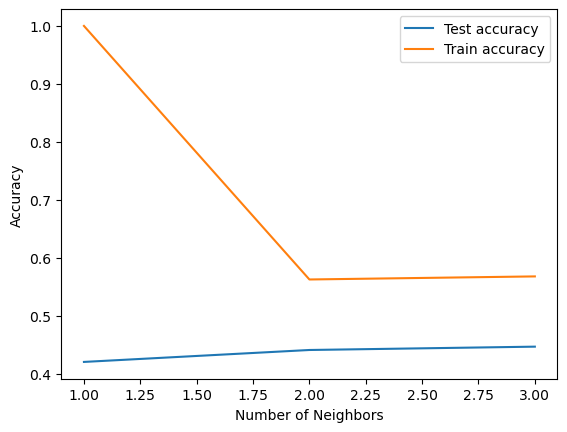

In [29]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

4. Generation of Confusion Matrices for Training and Testing Datasets

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


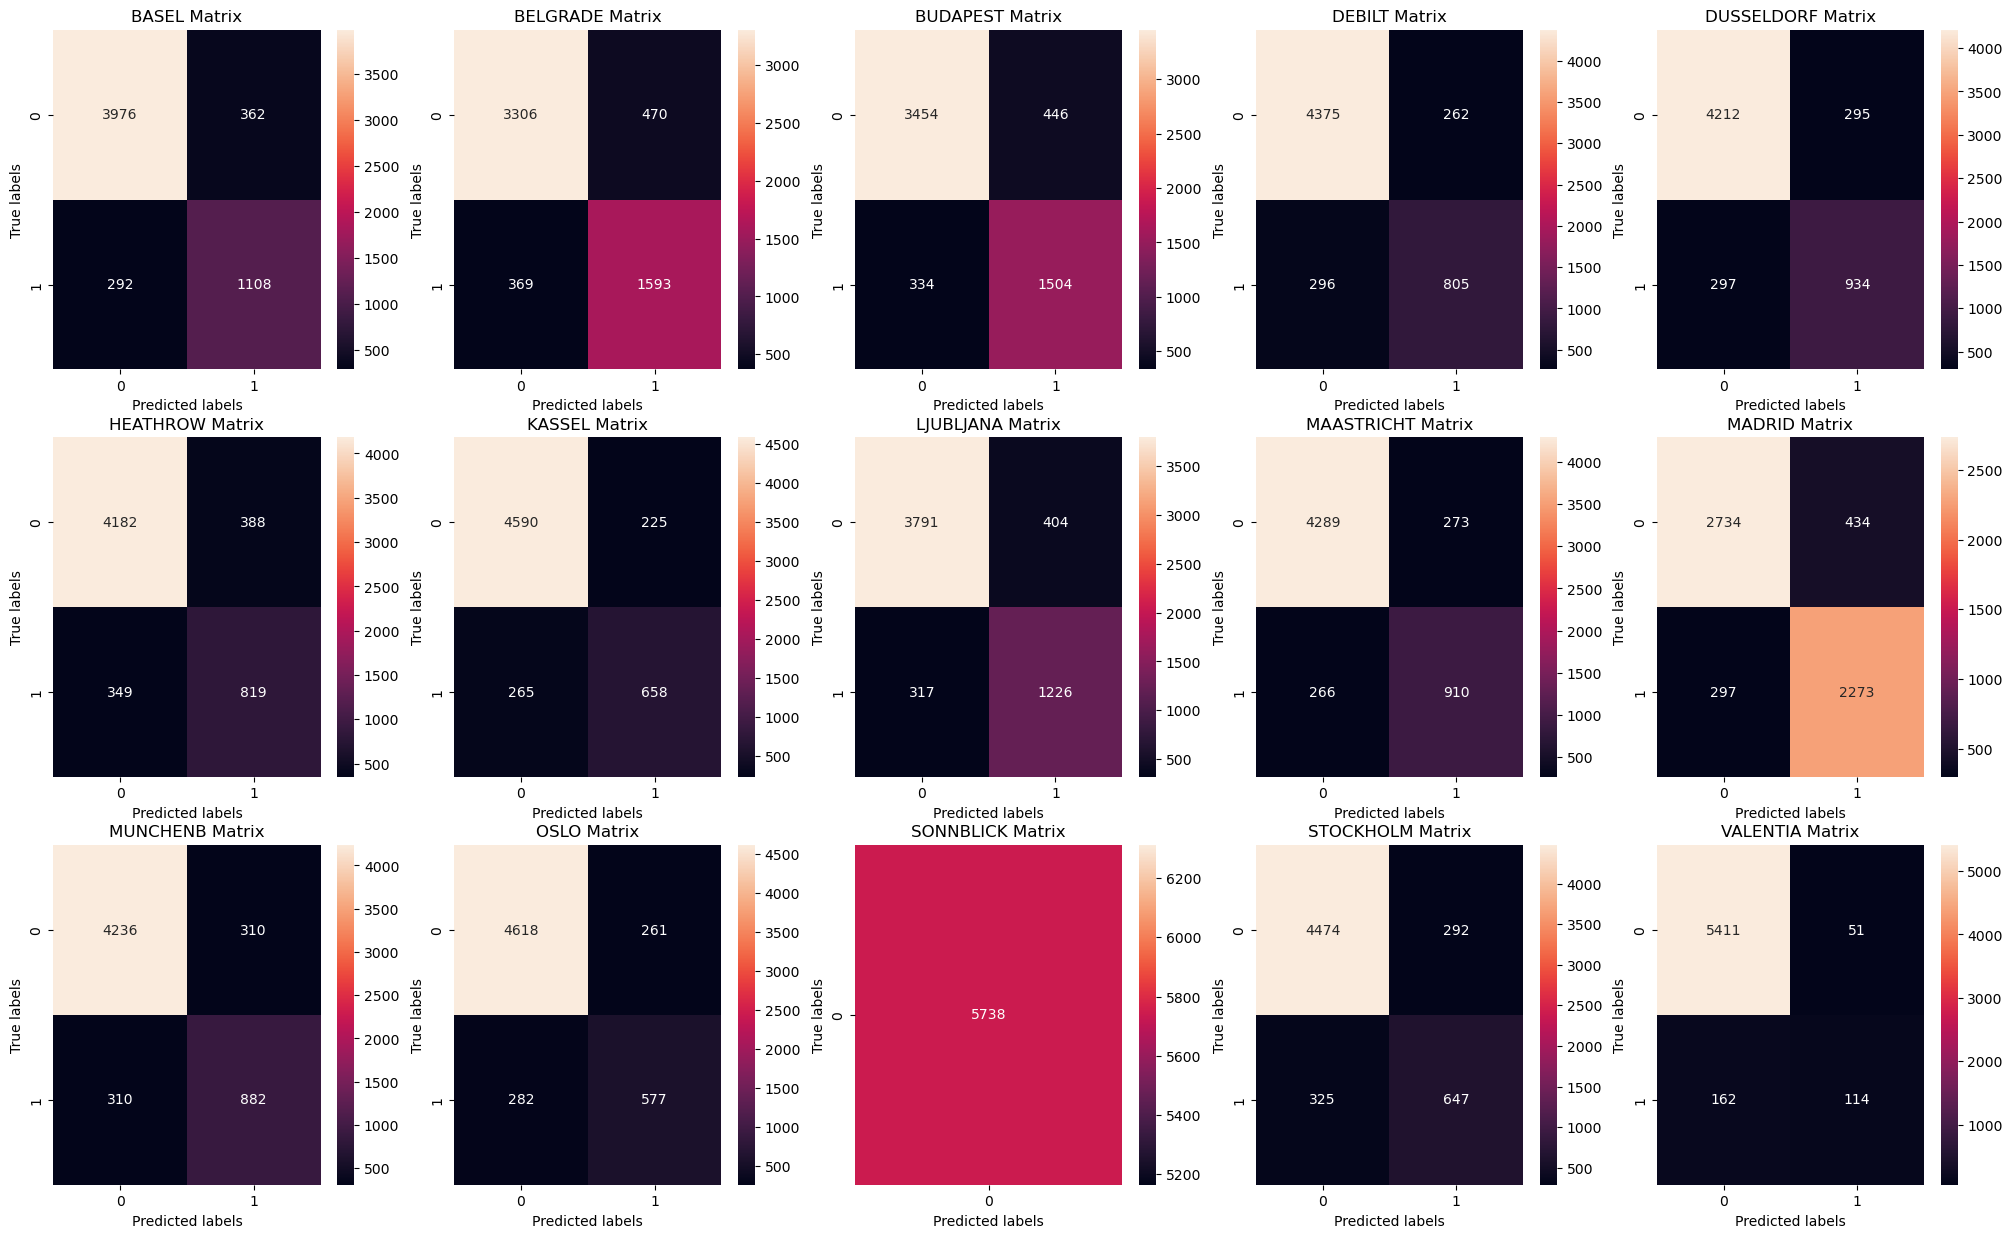

In [30]:
#generate confusion matrix based on suitable 'k' values
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

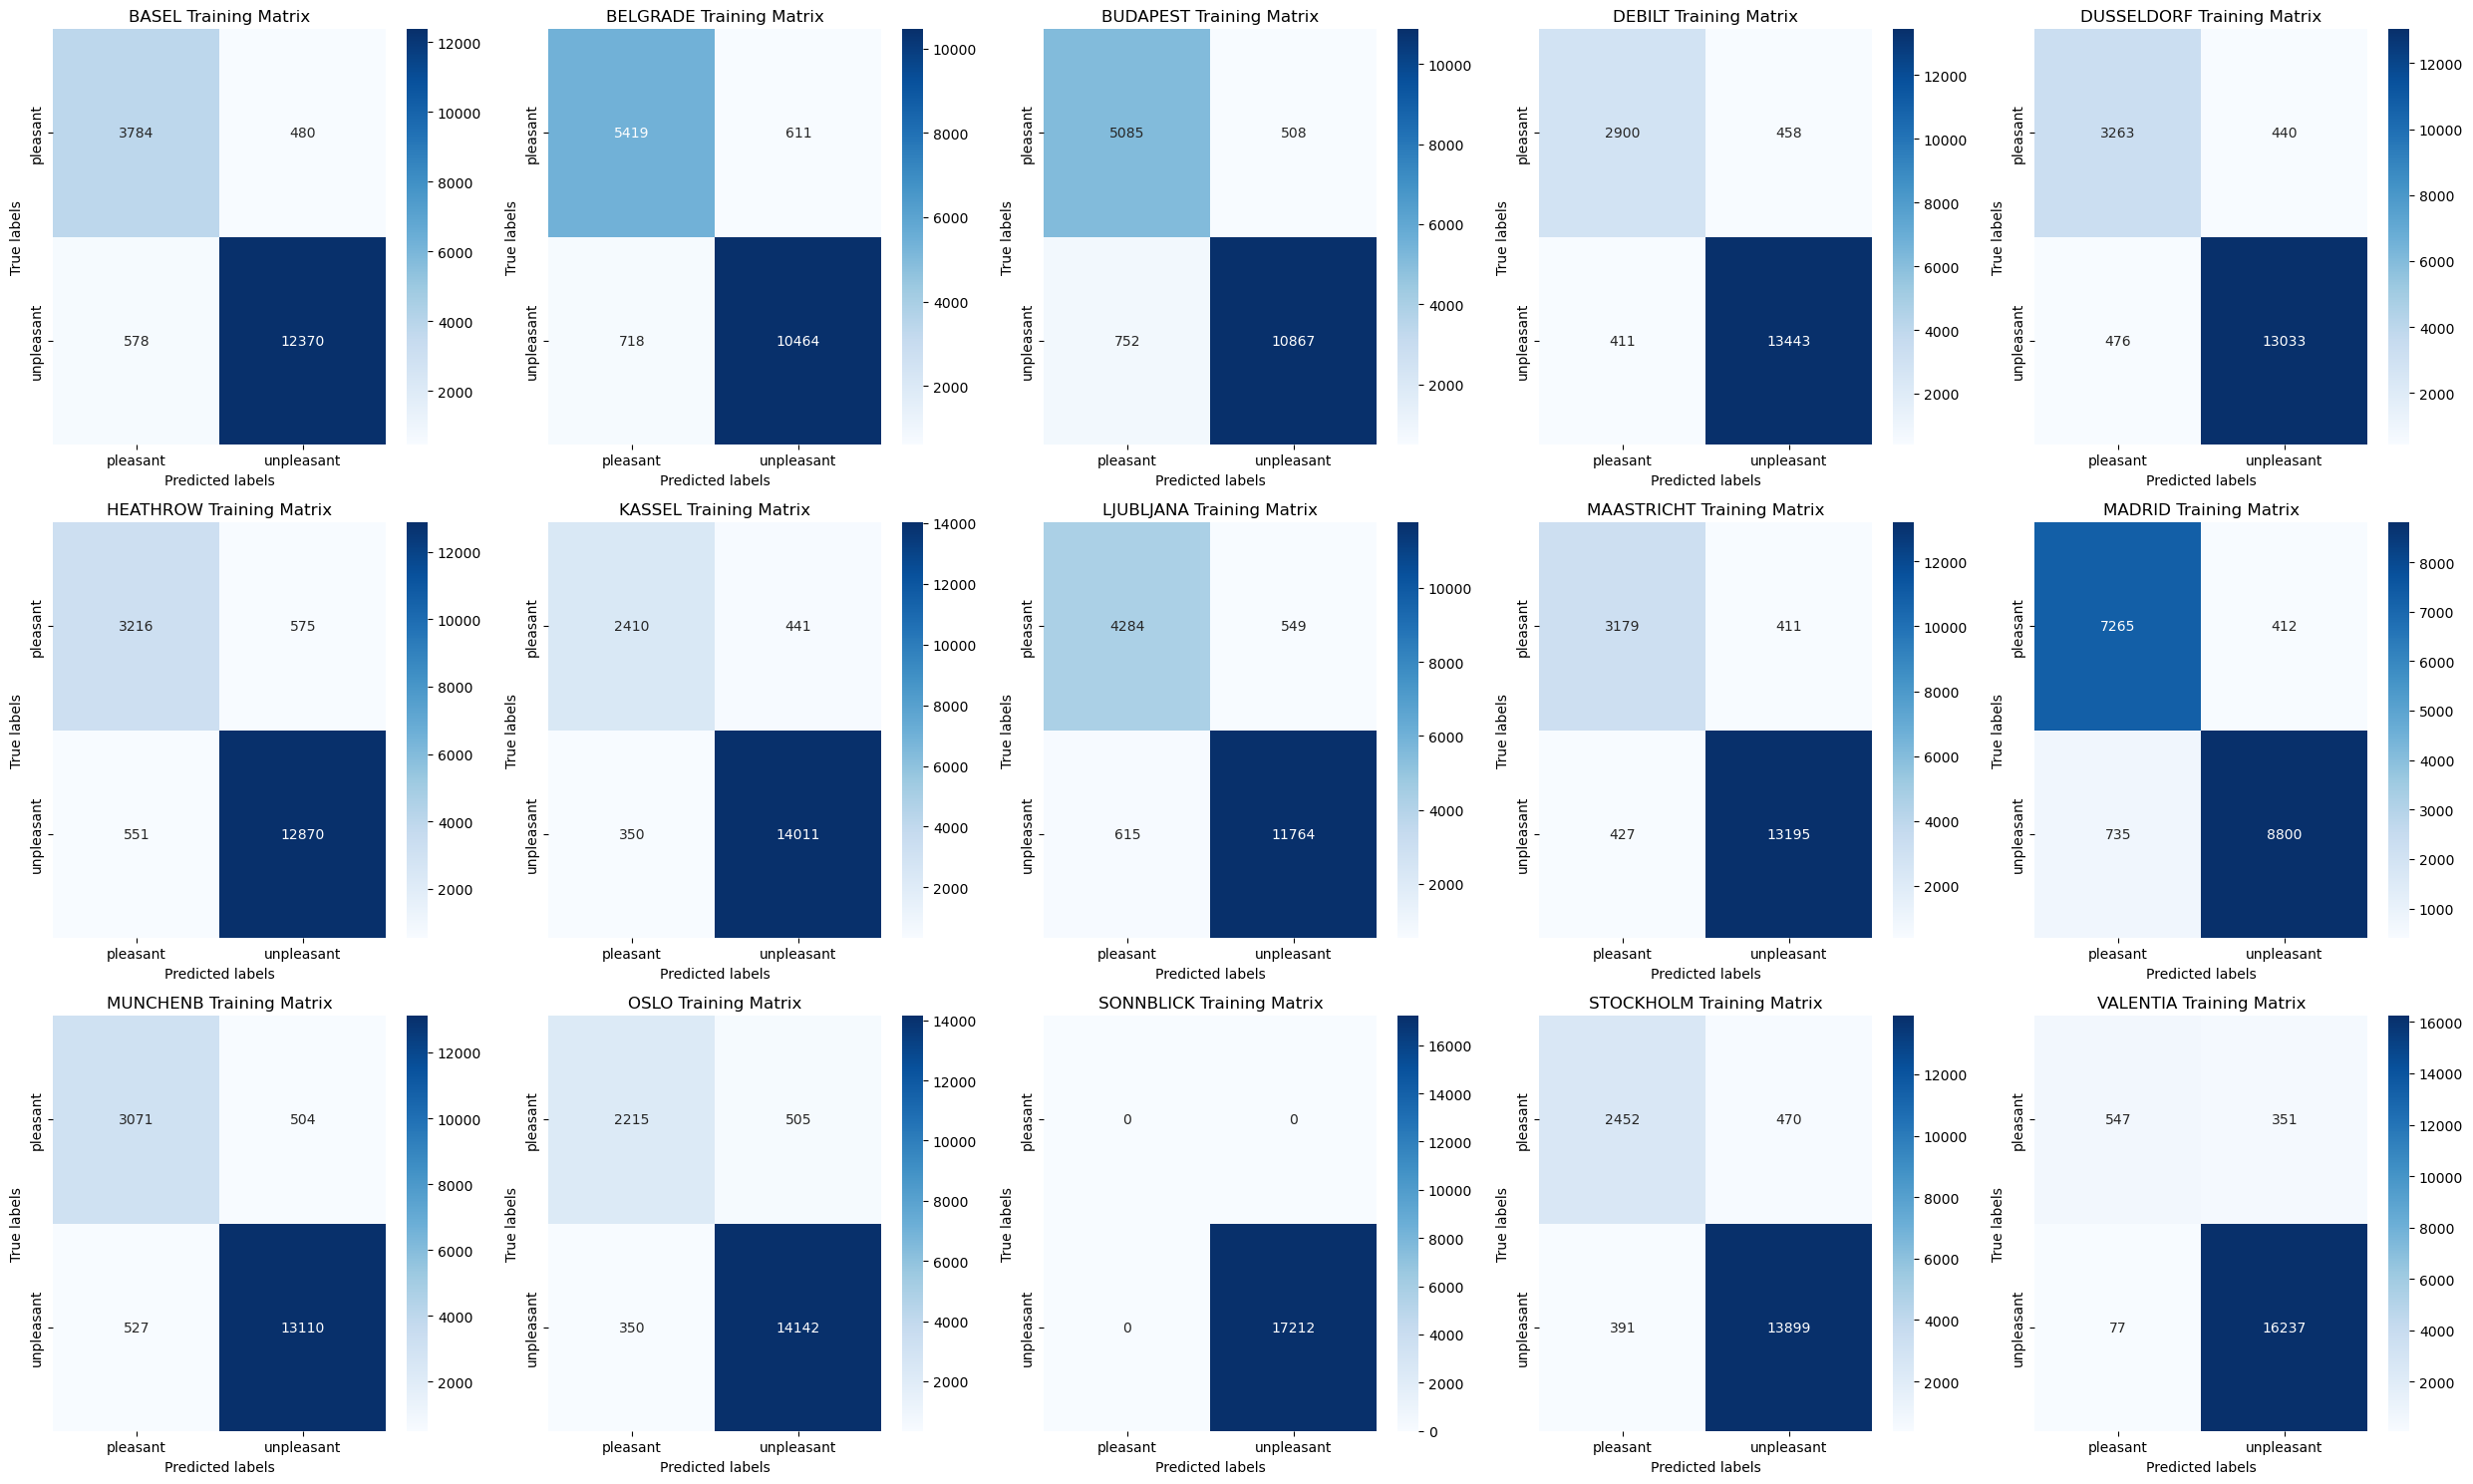

In [61]:

# Generate predictions for both training and testing sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Plot confusion matrices for training set
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_train.loc[:, name + key], y_train_pred[:, count], labels=[1, 0])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Training Matrix')
            ax[i, j].set_xticks([0.5, 1.5])
            ax[i, j].set_yticks([0.5, 1.5])
            ax[i, j].set_xticklabels(labels)
            ax[i, j].set_yticklabels(labels)
            count += 1
plt.tight_layout()
plt.show()



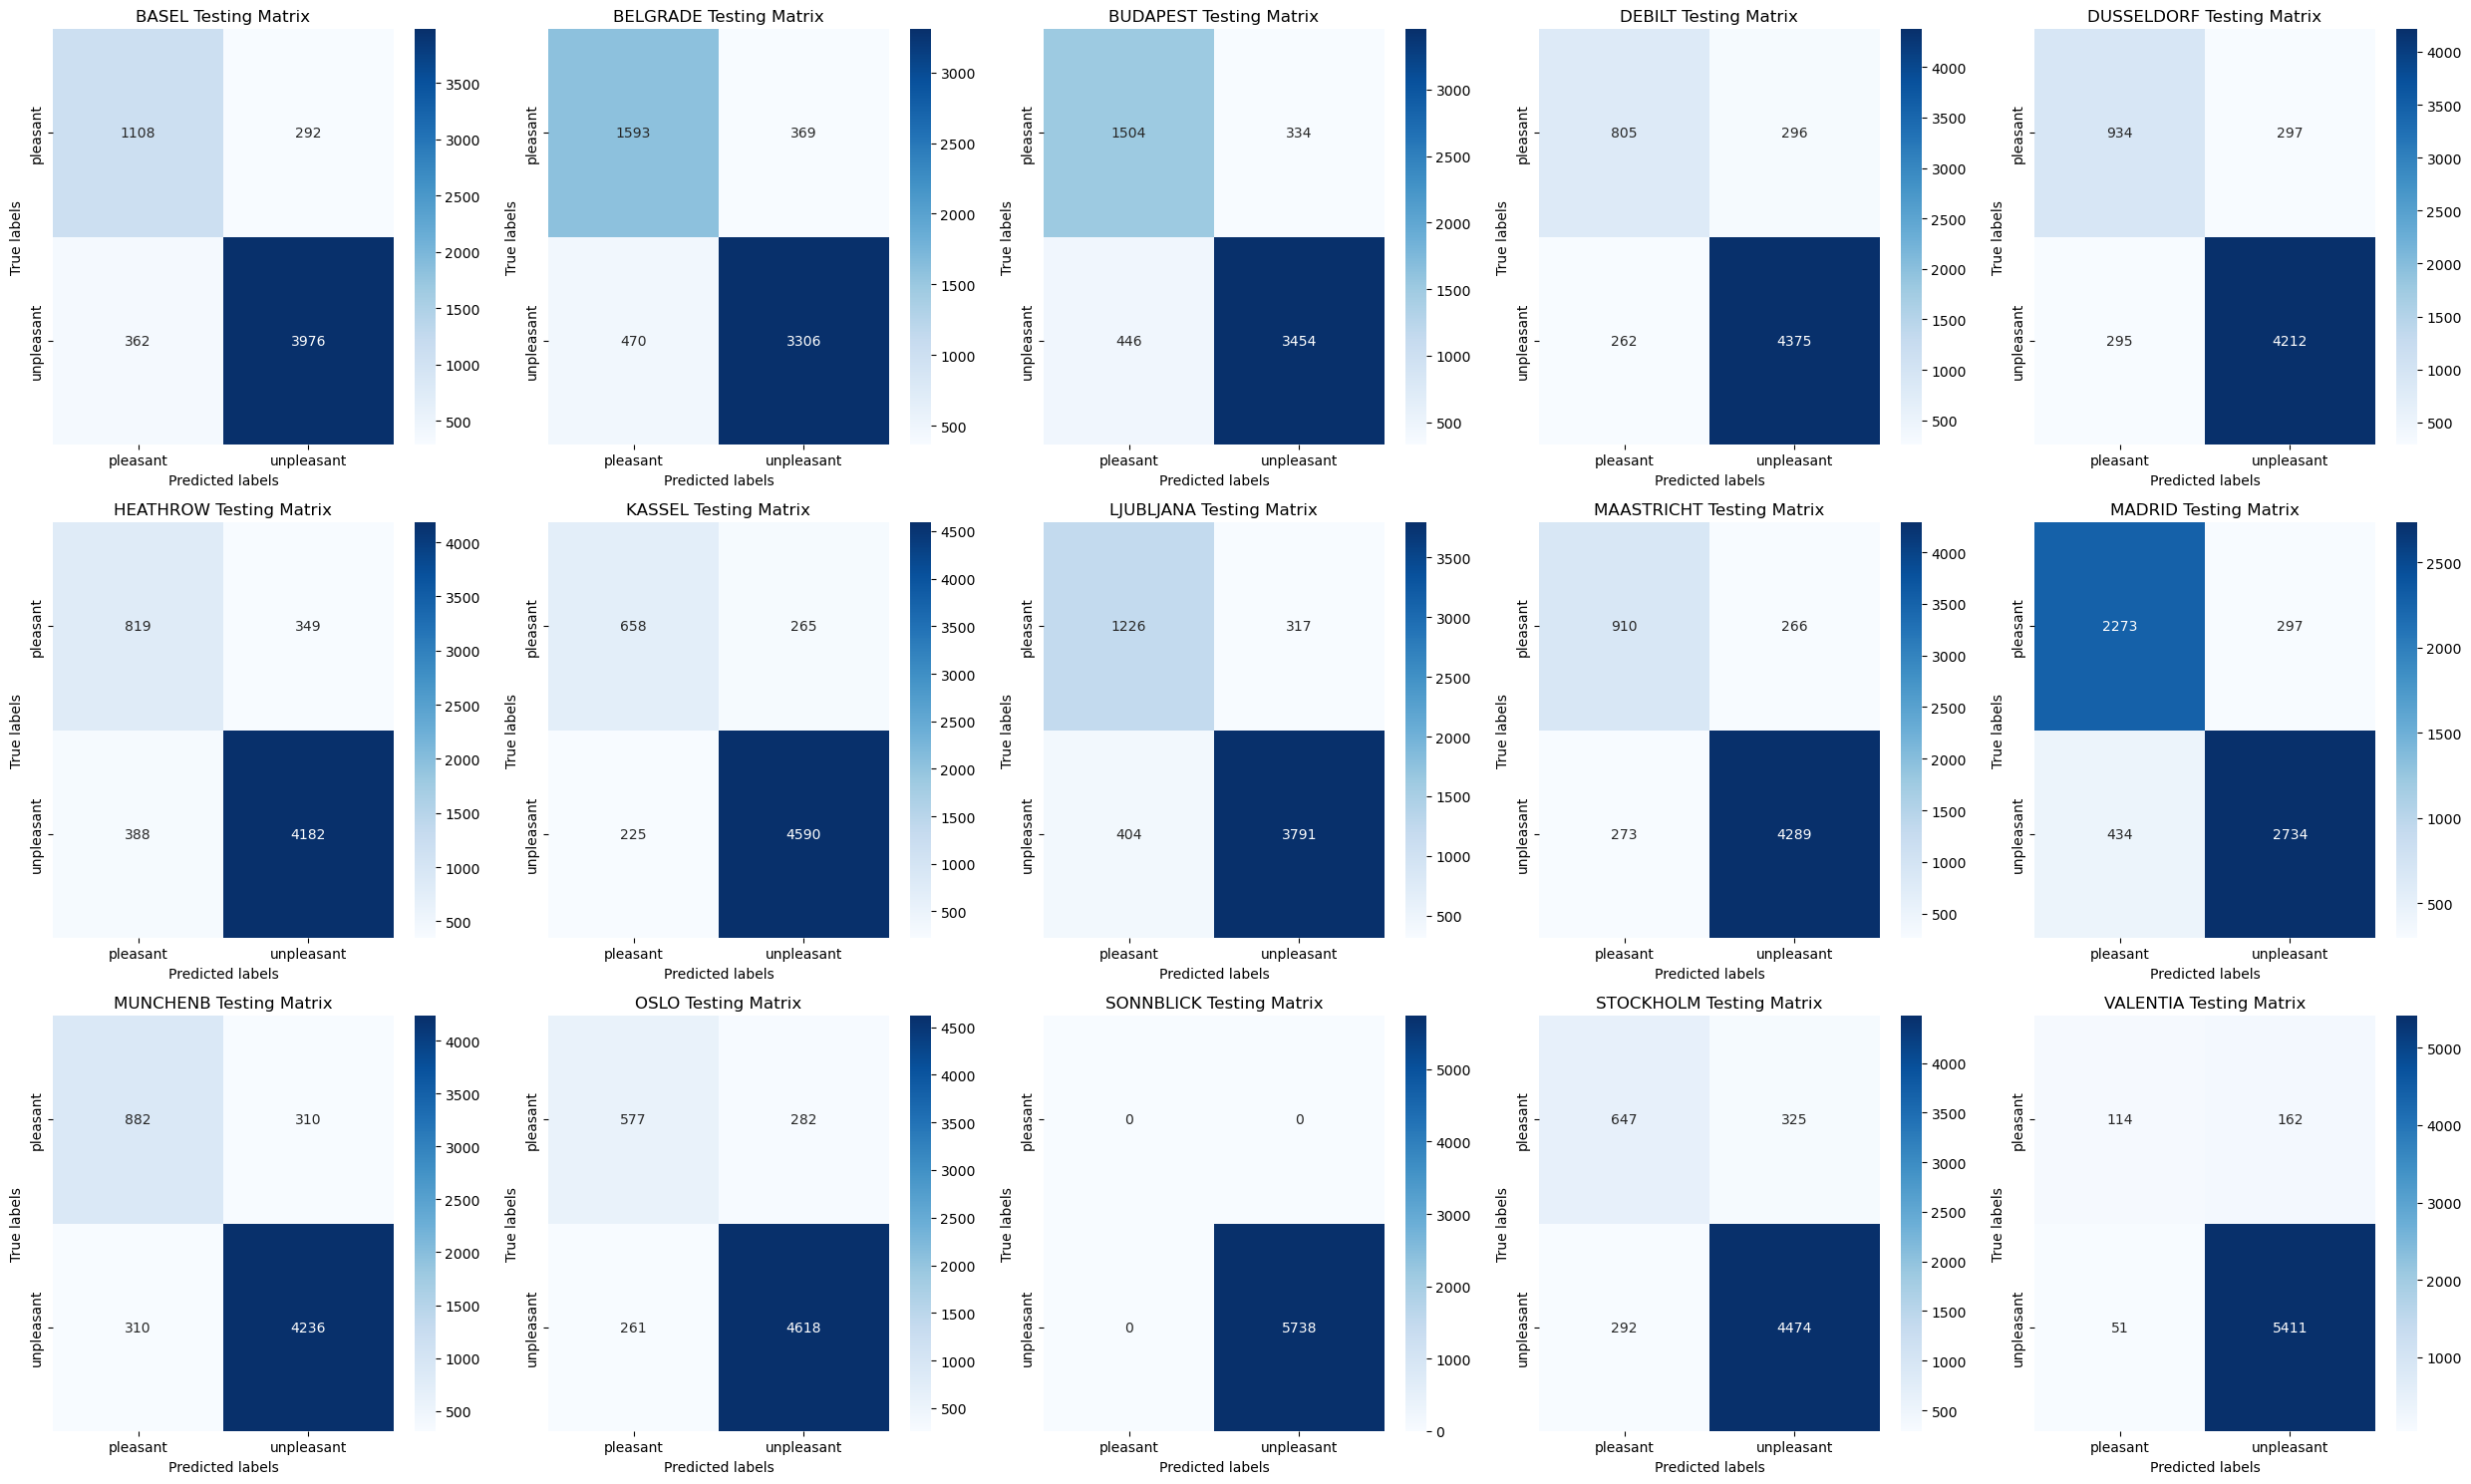

In [62]:
# Plot confusion matrices for testing set
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
count = 0
for i in range(3):
    for j in range(5):
        if count < len(locations):
            name = locations[count]
            cm = confusion_matrix(y_test.loc[:, name + key], y_test_pred[:, count], labels=[1, 0])
            sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap='Blues')
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Testing Matrix')
            ax[i, j].set_xticks([0.5, 1.5])
            ax[i, j].set_yticks([0.5, 1.5])
            ax[i, j].set_xticklabels(labels)
            ax[i, j].set_yticklabels(labels)
            count += 1
plt.tight_layout()
plt.show()